# Assignment 2 - Logistic Regression & Naive Bayes

Due by 11:59pm, Feb 24, 2023

## Theory Questions (Full points: 40, each question 4 points)

1. Explain the importance of setting up learning rate in the gradient descent based methods. 

**Answer:** The learning rate is a parameter used in gradient descent methods that controls how much the weights of the model  change for each iteration. If the learning rate is too low, the model will learn slower and spend too much time to converge, however, if the learning rate is too high , the model will change too much after each iteration and may not converge easily, overshooting the global minimum. Therefore, it is important to find the optimal learning rate that converges the model to its best performance in the shortest amount of time.

2. What is the stochastic gradient descent? Why do we need stochastic gradient descent?

**Answer:** Stochastic gradient descent is an optimization technique used in Machine Learning to update model parameters. It is an iterative algorithm that takes random samples of data, trains the model on these samples, and then train the updated model with new samples of data. We need Stochastic Gradient Descent because it is more computationally efficient than batch gradient descent, as it only uses a subset of the training data to train the model in each iteration. 

3. Explain the reasons to perform feature scaling.

**Answer:** Feature scaling is a method used to normalize the range of independent variables or features in data. It is important for the following reasons:

1. It levels out the importance between different features when calculating distance between points.

2. Gradient descent converges much faster with feature scaling than without it.

3. It levels the influence of different weights in the loss function when using regularization as part of the loss function.

4. What is the probabilistic generative model?

**Answer:** In statistical classification, a probabilistic generative model is a type of generative model that uses probability distributions to generate data samples. These models are used in machine learning to model the distribution of data, generate new data samples that are similar to the original data or make predictions about future data samples by using the probability distributions of data.

5. Explain how we perform maximum likelihood.

**Answer:** We perform maximum likelihood by calculating the probability of ocurrence for each data point for our model given our current parameters and changing these parameters so that we maximize the probability of occurrence of our dataset.

6. Explain the reasons about using cross entropy loss in logistic regression.

**Answer:** Cross entropy loss is often used as the cost function in logistic regression. It measures the difference between predicted and actual probabilities, and is used to optimize the model's parameters. Cross entropy loss is useful as it is closely related to the concept of information theory, and can be used to measure the uncertainty of a model's predictions. Additionally, cross entropy loss is more robust to outliers than other cost functions, and can handle cases where the probabilities of the predicted and actual classes are very different.

7. Explain the differences between discriminative and generative model.


**Answer:**

Discriminative models are used to predict labels or classes given input data and are used in classification tasks. These models learn the conditional probability of a given label y given the data x. Examples of these models are logistic regression and support vector machines.

Generative models are models used to model the joint probability of a given data point x and its label y. We can use this information to generate new data points with its associated labels or predict the probability of each occurrence. Examples of generative models are Hidden Markov Models and Naive Bayes.

8. What is N-folds? Explain the reasons why we need N-folds. 

**Answer:** N-folds is a cross-validation technique used to evaluate machine learning models. The technique divides the dataset into N equal-size subsamples and use iteratively each subsample for testing and the remaining for training. This process is repeated N times, so that each subsample is used for testing once. Finally, we average the results to obtain the final model performance.

We need N-folds because it allows us to use all the data for testing and training, but at the same time reducing overfitting, which helps us make better use of the available data.

9. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.12

**Answer:**
$ σ(a)= \frac{1}{1+e^{-a}} \\
σ\prime(a)= \frac{e^{-a}}{(1+e^{-a})^2} = \frac{1}{1+e^{-a}} \cdot \frac{e^{-a}}{1+e^{-a}} = σ(a) ⋅ (1+\frac{e^{-a}}{1+e^{-a}}-1)= σ(a) ⋅ (1+\frac{-1}{1+e^{-a}}) = \sigma(a) \cdot (1-\sigma(a))
$

10. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.13

**Answer:**
$ E(w)=-\sum_{n=1}^{N} {t_n ln(y_n)+(1-t_n)ln(1-y_n)} \\
\frac{\partial E}{\partial y_n} =  -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n} = \frac{y_n(1-t_n)-t_n(1-y_n)}{y_n(1-y_n)} = \frac{y_n-t_n}{y_n(1-y_n)} $

we know that 

$ \frac{\partial y_n}{\partial a_n}=\sigma(a_n) \cdot (1-\sigma(a_n))=y_n(1-y_n)
$

and 

$ \nabla a_n= \phi_n \\
$

so, finally

$
\nabla E= \sum_{n=1}^{N} \frac{\partial E}{\partial y_n} \frac{\partial y_n}{\partial a_n} \nabla a_n =  \sum_{n=1}^{N}(y_n-t_n)\phi_n
$

## Programming Questions (Full points: 60, each question 30 points)

In [1]:
# Do not edit the codes in this cell
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
# load dataset
x, y = load_wine(return_X_y=True)

### - Logistic Regression

0. train_test_split (Done in the below cell)

We **randomly** split data into train and test set. The number of training data and testing data is 100 and 30, respectively. Do not modify the split data. You need to use training data to train your model and obtain an optimal solution. Finally, using your model with the optimal solution to predict the testing data. 

In [2]:
# Do not edit the codes in this cell
# We split train and test data for logistic regression function

test_lists = [0, 4, 5, 7, 13, 15, 19, 27, 28, 30, 31, 34, 39, 47, 63, 74, 78, 83, 90, 92, 95, 97, 103, 113, 119, 122, 123, 125, 126, 127]

x = x[:130, :]
y = y[:130]

# training data: you can use it to training your model.
train_x = np.array([sub_x for index, sub_x in enumerate(x) if index not in test_lists])
train_y = np.array([sub_y for index, sub_y in enumerate(y) if index not in test_lists])

# testing data: ONLY use it to measure your model, do NOT use during training.
test_x = np.array([sub_x for index, sub_x in enumerate(x) if index in test_lists])
test_y = np.array([sub_y for index, sub_y in enumerate(y) if index in test_lists])

In the assignment 2, you have more freedom on your programming design. In this part, you are going to implement your own Logistic Regression function. You need to implement logistic regression with stochastic gradient descent from scratch. The required functions are listed below. You can add more functions as you need. **No library versions of logistic regression are allowed**. 
_________

1. train_val_split

**Randomly** split training data into train and val set. 80% of the training data will be the train set and 20% of the training data will be the val set.

2. normalization (data preprocessing)

You should normalize all data for each attribute firstly. 

3. sigmoid

The core of logistic regression

4. predict

Predict an output value for a given x with a set of coefficients. 

5. accurate

Calculate accuracy percentage of the predictions.

6. coef_gd

Estimate logistic regression coefficients using **vanilla gradient descent**. Using **the cross entropy loss**. Carefully choose learning rate and epochs values.

7. draw_model

a) Plot the both training loss and validation loss for each epochs.

b) Plot the both training accuracy and validation accuracy for each epochs. 

8. predict the testing data

Use your pre-trained model to predict the testing data. Print out your **testing accurate**. Is it good? If not, analyze the reason in short and modify your code to improve.  


The predicted values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
And the testing ones are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The testing accuracy is : 1.0 which is very high


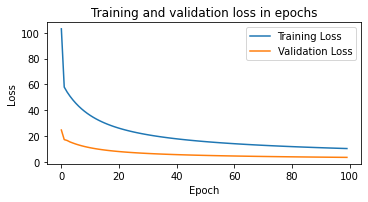

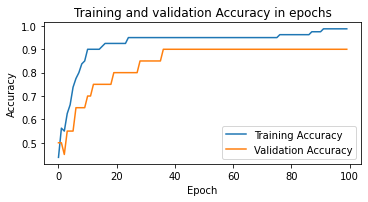

In [3]:
def train_val_split (train_x,train_y, ValidationPercentage=0.2):
#1 train_val_split
  np.random.seed(seed=2311)
#create the validation indexes
  index2= np.arange(len(train_x))
  np.random.shuffle(index2)
  ValidationIndexes= index2[0:round(len(train_x)*ValidationPercentage)]

#Create the validation sample
  validation_x = np.array([sub_x for index, sub_x in enumerate(train_x) if index in ValidationIndexes])
  validation_y = np.array([sub_y for index, sub_y in enumerate(train_y) if index in ValidationIndexes])

#Create the training sample
  training_x = np.array([sub_x for index, sub_x in enumerate(train_x) if index not in ValidationIndexes])
  training_y = np.array([sub_y for index, sub_y in enumerate(train_y) if index not in ValidationIndexes])

  return(training_x,validation_x,training_y,validation_y)



def normalization(array):

  Highest=np.array([])
  Lowest=np.array([])

  for i in array.T:
    Highest=np.append(Highest,max(i))
    Lowest=np.append(Lowest,min(i))
  arrayN=(array-Lowest)/(Highest-Lowest)

  return arrayN

def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z

def predict(x,coefficients):
  x2=np.append(np.array([1]),x)
  s=sum(x2*coefficients)
  return round(sigmoid(s))

def probability(x,coefficients):
  x2=np.append(np.array([1]),x)
  s=sum(x2*coefficients)
  return sigmoid(s)

def accurate(y,predictions):
  success= y==predictions
  return(success.sum()/len(success))

def calculateLoss(y,probabilities):
  loss=-sum(y*np.log(probabilities)+(1-y)*np.log(1-probabilities))
  return loss



def coef_gd( x, y,x_val,y_val, l=0.02, epochs=100):
  x=normalization(x)
  x_val=normalization(x_val)
  coefficients=np.random.randn(len(x.T)+1)
  loss=np.array([])
  ValLoss=np.array([])

  ACC=np.array([])
  ValACC=np.array([])

  for epoch in range(epochs):
    predictions=np.array([])
    probabilities=np.array([])
    Valpredictions=np.array([])
    Valprobabilities=np.array([])
    
#Make predictions and get probabilities
    for row in x:
      predictions=np.append(predictions,predict(x=row, coefficients=coefficients))
      probabilities=np.append(probabilities,probability(x=row,coefficients=coefficients))
#Calculate the loss and accuracy
    loss=np.append(loss,calculateLoss(y,probabilities))
    ACC=np.append(ACC,accurate(y,predictions))
#Calculate the validation loss
    for row in x_val:
      Valpredictions=np.append(Valpredictions,predict(x=row, coefficients=coefficients))
      Valprobabilities=np.append(Valprobabilities,probability(x=row,coefficients=coefficients))
#Calculate the validation loss and accuracy
    ValLoss=np.append(ValLoss,calculateLoss(y_val,Valprobabilities))
    ValACC=np.append(ValACC,accurate(y_val,Valpredictions))
#Update the weights
    for col in range(len(coefficients)):
      s=0
      for row in range(len(x)):
        s=s-(y[row]-probabilities[row])*np.append(np.array([1]),x[row,:])[col]
      coefficients[col]=coefficients[col]-l*s
  return coefficients, loss, ValLoss, ACC, ValACC

def draw_model(loss,ValLoss,ACC,ValACC):
#Plot the training and validation loss
  fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
  ax.plot(range(len(loss)), loss, label='Training Loss')  
  ax.plot(range(len(ValLoss)), ValLoss, label='Validation Loss') 
  ax.set_xlabel('Epoch') 
  ax.set_ylabel('Loss') 
  ax.set_title("Training and validation loss in epochs")  
  plt.legend()

#Plot the training and validation Accuracy
  fig2, ax2 = plt.subplots(figsize=(5, 2.7), layout='constrained')
  ax2.plot(range(len(ACC)), ACC, label='Training Accuracy')  
  ax2.plot(range(len(ValACC)), ValACC, label='Validation Accuracy') 
  ax2.set_xlabel('Epoch') 
  ax2.set_ylabel('Accuracy') 
  ax2.set_title("Training and validation Accuracy in epochs")  
  plt.legend()


##Main: divide between validation and training
training_x,validation_x,training_y,validation_y = train_val_split(train_x,train_y, ValidationPercentage=0.2)

#perform the descent
weights, loss, ValLoss, ACC, ValACC = coef_gd(x=training_x, x_val=validation_x, y_val=validation_y, y=training_y, l=0.02, epochs=100)

#draw the results of the losses
draw_model(loss=loss,ValLoss=ValLoss,ACC=ACC,ValACC=ValACC)

#Predict the testing data
pred=np.array([])
for row in normalization(test_x):
      pred=np.append(pred,predict(x=row, coefficients=weights))
print("The predicted values are:",pred.astype(int))
print("And the testing ones are:",test_y)
print("The testing accuracy is :",sum(pred==test_y)/len(test_y),"which is very high")


### - Naive Bayes Classifier

In this part, you are going to implement your own naive bayes classifier. 
You need to implement naive bayes classifier from scratch **using the training data of wine datasets train_x and train_y**. The required functions are listed below. You can add more functions as you need. **No library versions of naive bayes classifier are allowed**. 
_________

1. train_val_split

**Randomly** split training data into train and val set. 80% of the training data will be the train set and 20% of the training data will be the val set.

2. normalization (data preprocessing)

You should normalize all data for each attribute firstly. 

3. cross_validation_split

**Randomly** split data into 5 folds.


4. predict

Predict the class label for a given x. 

5. accurate

Calculate accuracy percentage of the predictions. Remember to average the results of k folds

6. gaussian_probability

Calculate the Gaussian probability distribution function for the given x. 

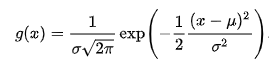


5. class_probability

Calculate the probabilities of predicting each class for a given x using naive bayes algorithm. Be aware that we have multiple input variables. And you may want to use gaussian_probability function here.

*Print out your accuracy result. Is it good? If not, analyze the reason in short. *


In [5]:
def train_val_split (train_x,train_y, ValidationPercentage=0.2):
#1 train_val_split
  np.random.seed(seed=2311)
#create the validation indexes
  index2= np.arange(len(train_x))
  np.random.shuffle(index2)
  ValidationIndexes= index2[0:round(len(train_x)*ValidationPercentage)]

#Create the validation sample
  validation_x = np.array([sub_x for index, sub_x in enumerate(train_x) if index in ValidationIndexes])
  validation_y = np.array([sub_y for index, sub_y in enumerate(train_y) if index in ValidationIndexes])

#Create the training sample
  training_x = np.array([sub_x for index, sub_x in enumerate(train_x) if index not in ValidationIndexes])
  training_y = np.array([sub_y for index, sub_y in enumerate(train_y) if index not in ValidationIndexes])

  return(training_x,validation_x,training_y,validation_y)

def normalization(array):

  Highest=np.array([])
  Lowest=np.array([])

  for i in array.T:
    Highest=np.append(Highest,max(i))
    Lowest=np.append(Lowest,min(i))
  arrayN=(array-Lowest)/(Highest-Lowest)

  return arrayN

def cross_validation_split (train_x,train_y, K=5):

  np.random.seed(seed=2311)
  #create the validation indexes
  index2= np.arange(len(train_x))
  np.random.shuffle(index2)
  kIndexes=[]

  for i in range(K):
    kIndexes.append(index2[round(len(train_x)*(i/K)):round(len(train_x)*((i+1)/K))])

  #Create the k samples
  k_x = []
  k_y = []

  for i in range(K):
    k_x.append(np.array([sub_x for index, sub_x in enumerate(train_x) if index in kIndexes[i]]))
    k_y.append(np.array([sub_y for index, sub_y in enumerate(train_y) if index in kIndexes[i]]))

  return k_x,k_y

def calculate_m_sd(x):
  m_sd = np.zeros((2,len(x.T)))
  for col in range(len(x.T)):
    m_sd[0,col]=np.mean(x[col])
    m_sd[1,col]=np.std(a=x[col], ddof=1)
  return m_sd

def gaussian_probability(x,m,sd):
  exponent = np.exp(-((x-m)**2 / (2 * sd**2 )))
  return (1 / (np.sqrt(2 * np.pi) * sd)) * exponent




def predict(m_sd0,m_sd1,vector):
  p0=1
  p1=1

  for i in range(len(vector)):
    p0=p0*gaussian_probability(vector[i],m_sd0[0,i],m_sd0[1,i])
    p1=p1*gaussian_probability(vector[i],m_sd1[0,i],m_sd1[1,i])
  if p0>p1:
    result=0
  else:
    result=1
  return result

def separate01(kx,ky):
  index0 = ky[0]==0
  index1 = ky[0]==1
  k0 = kx[0][index0]
  k1 = kx[0][index1]
  for i in range(1,len(ky)):
    index0 = ky[i]==0
    k0= np.append(k0,kx[i][index0], axis=0)
    index1 = ky[i]>0
    k1= np.append(k1,kx[i][index1], axis=0)
  return(k0,k1)

def accurate(kx, ky, x_test, y_test):
  k0, k1 = separate01(kx,ky)
  m_sd0 = calculate_m_sd(k0)
  m_sd1 = calculate_m_sd(k1)
  prediction = []
  for vector in x_test:
    prediction.append(predict(m_sd0=m_sd0, m_sd1 = m_sd1, vector = vector))
  ACC = np.mean(y_test==prediction)
  return ACC

def accurateKfold(kx,ky):
  accuracyv=np.zeros(len(kx))
  for i in range(len(kx)):
    kx2=[]
    ky2=[]
    for j in range(len(kx)):
      if(j!=i):
        kx2.append(kx[j])
        ky2.append(ky[j])
    accuracyv[i] =accurate(kx2,ky2,kx[i],ky[i])
    meanaccuracy=np.mean(accuracyv)

  return meanaccuracy

def class_probability(m_sd0,m_sd1,vector,P1general):
  p0C=1
  p1C=1

  for i in range(len(vector)):
    p0C=p0C*gaussian_probability(vector[i],m_sd0[0,i],m_sd0[1,i])
    p1C=p1C*gaussian_probability(vector[i],m_sd1[0,i],m_sd1[1,i])
  cprobability0=(p0C*(1-P1general))/((p0C*(1-P1general))+(p1C*P1general))
  cprobability1=(p1C*(P1general))/((p0C*(1-P1general))+(p1C*P1general))
  return cprobability0,cprobability1


##Main: divide between validation and training
training_x,validation_x,training_y,validation_y = train_val_split(train_x,train_y, ValidationPercentage=0.2)

#Normalize
training_x=normalization(training_x)

#get the k folds
kx,ky = cross_validation_split(training_x,training_y,K=5)

#build the model and test the accuracy on the k folds
meanACC= accurateKfold(kx,ky)

#get m_sd of the full training data
k0,k1 = separate01(kx,ky)
m_sd0=calculate_m_sd(k0)
m_sd1=calculate_m_sd(k1)
p1General = len(k1)/(len(k0)+len(k1))

#Get the class probabilities for the test data
test_xN = normalization(test_x)
probability=[]
for i in range(len(test_x)):
  probability.append(class_probability(m_sd0=m_sd0, m_sd1= m_sd1, vector = test_xN[i], P1general = p1General))

#Get predictions for the testing data and print the results
probability = np.array(probability)
predictions = (probability.T[0]<probability.T[1])*1
print("The predicted values are:",predictions)
print("The test values are",test_y)
accuracyTest = np.mean(predictions==test_y)
print("The model has a", accuracyTest*100,"% accuracy, which is good enough, but worse than that of the logistic regression.This model does not change iteratively to fit better, and that is why the other logistic regression did better.")

The predicted values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0]
The test values are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The model has a 76.66666666666667 % accuracy, which is good enough, but worse than that of the logistic regression.This model does not change iteratively to fit better, and that is why the other logistic regression did better.
